<a href="https://colab.research.google.com/github/alec-carawan/Intro-to-Machine-Learning/blob/main/HW4_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [265]:
cancerURL    =  'https://raw.githubusercontent.com/alec-carawan/datasets/main/cancer.csv'
housingURL   =  'https://raw.githubusercontent.com/alec-carawan/datasets/main/Housing.csv'

cancerSet    =   pd.read_csv(cancerURL)
housingSet   =   pd.read_csv(housingURL)

In [266]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housingSet[varlist] = housingSet[varlist].apply(binary_map)

#map furnishing status
housingSet['furnishingstatus'] = housingSet['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

In [267]:
#STANDARDIZE DATA

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['price','area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']
#using num_vars keeps data types as data frames, instead of np arrays

housingSet[num_vars] = scaler.fit_transform(housingSet[num_vars])

In [268]:
features = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']
# Separating out the features
X = housingSet.loc[:, features].values
# Separating out the target
y = housingSet.loc[:,['price']].values

In [269]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, )

In [270]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)
y_poly = svr_poly.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Q2.1)

Plot your regression model for SVR similar to the sample code provided on Canvas

In [271]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_rbf)
mse = mean_squared_error(y_test, y_rbf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_rbf)

print("RBF Results\n")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

RBF Results

Mean Absolute Error (MAE): 0.08019441189014673
Mean Squared Error (MSE): 0.011986744156004543
Root Mean Squared Error (RMSE): 0.10948399040957789
R-squared (R2) Score: 0.4956369420752499


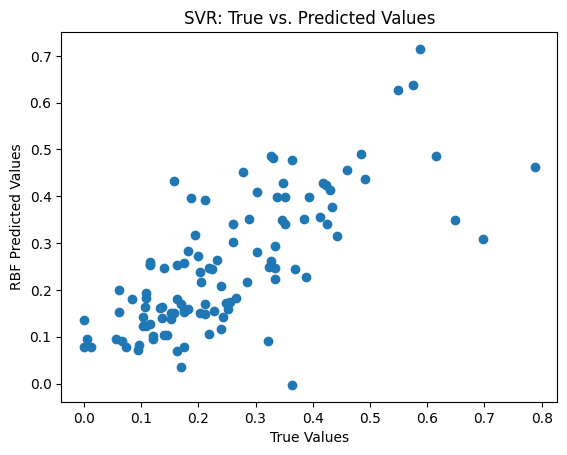

In [272]:
plt.scatter(y_test, y_rbf)
plt.xlabel("True Values")
plt.ylabel("RBF Predicted Values")
plt.title("SVR: True vs. Predicted Values")
plt.show()

In [273]:
mae = mean_absolute_error(y_test, y_lin)
mse = mean_squared_error(y_test, y_lin)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_lin)

print("Linear Results\n")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Linear Results

Mean Absolute Error (MAE): 0.06794985013010738
Mean Squared Error (MSE): 0.007849794702078217
Root Mean Squared Error (RMSE): 0.08859906716257354
R-squared (R2) Score: 0.6697062681496868


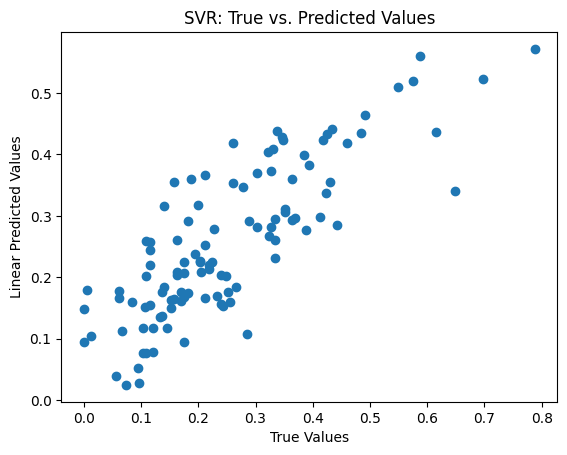

In [274]:
plt.scatter(y_test, y_lin)
plt.xlabel("True Values")
plt.ylabel("Linear Predicted Values")
plt.title("SVR: True vs. Predicted Values")
plt.show()

In [275]:
mae = mean_absolute_error(y_test, y_poly)
mse = mean_squared_error(y_test, y_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_poly)

print("Polynomial Results\n")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Polynomial Results

Mean Absolute Error (MAE): 0.06379312901116806
Mean Squared Error (MSE): 0.0069343255678093905
Root Mean Squared Error (RMSE): 0.08327259794079557
R-squared (R2) Score: 0.7082262203557457


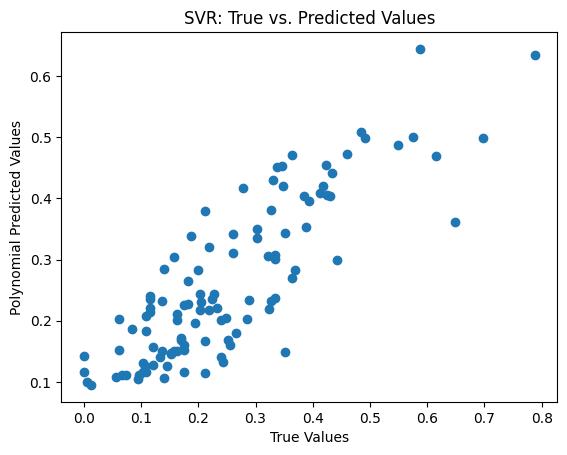

In [276]:
plt.scatter(y_test, y_poly)
plt.xlabel("True Values")
plt.ylabel("Polynomial Predicted Values")
plt.title("SVR: True vs. Predicted Values")
plt.show()

Q2.3)

Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest regression accuracy.

In [311]:
def feature_reduction(X, K):

    pca = PCA(n_components=K)
    principalComponents = pca.fit_transform(X)

    principalDf = pd.DataFrame(data = principalComponents)

    #name columns
    for i in range(0, K):
        principalDf = principalDf.rename(columns={principalDf.columns[i]: "principal component "+ str(i + 1)})

    return principalDf

In [296]:
#convert to DFs for PCA
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [316]:
one_var_PCA_train = feature_reduction(X_train, 1)
two_var_PCA_train = feature_reduction(X_train, 2)
three_var_PCA_train = feature_reduction(X_train, 3)
four_var_PCA_train = feature_reduction(X_train, 4)
five_var_PCA_train = feature_reduction(X_train, 5)
six_var_PCA_train = feature_reduction(X_train, 6)
seven_var_PCA_train = feature_reduction(X_train, 7)
eight_var_PCA_train = feature_reduction(X_train, 8)
nine_var_PCA_train = feature_reduction(X_train, 9)

one_var_PCA_test = feature_reduction(X_test, 1)
two_var_PCA_test = feature_reduction(X_test, 2)
three_var_PCA_test = feature_reduction(X_test, 3)
four_var_PCA_test = feature_reduction(X_test, 4)
five_var_PCA_test = feature_reduction(X_test, 5)
six_var_PCA_test = feature_reduction(X_test, 6)
seven_var_PCA_test = feature_reduction(X_test, 7)
eight_var_PCA_test = feature_reduction(X_test, 8)
nine_var_PCA_test = feature_reduction(X_test, 9)

I will evaluate the accuracy of K for PCA using the mean squared error of linear SVR

In [320]:
svr_lin = SVR(kernel='linear', C=1e3)

#X.reshape(-1, 1)

y_lin_one_var = svr_lin.fit(one_var_PCA_train, y_train).predict(one_var_PCA_test)
y_lin_two_var = svr_lin.fit(two_var_PCA_train, y_train).predict(two_var_PCA_test)
y_lin_three_var = svr_lin.fit(three_var_PCA_train, y_train).predict(three_var_PCA_test)
y_lin_four_var = svr_lin.fit(four_var_PCA_train, y_train).predict(four_var_PCA_test)
y_lin_five_var = svr_lin.fit(five_var_PCA_train, y_train).predict(five_var_PCA_test)
y_lin_six_var = svr_lin.fit(six_var_PCA_train, y_train).predict(six_var_PCA_test)
y_lin_seven_var = svr_lin.fit(seven_var_PCA_train, y_train).predict(seven_var_PCA_test)
y_lin_eight_var = svr_lin.fit(eight_var_PCA_train, y_train).predict(eight_var_PCA_test)
y_lin_nine_var = svr_lin.fit(nine_var_PCA_train, y_train).predict(nine_var_PCA_test)

mse_one_var = mean_squared_error(y_test, y_lin_one_var)
mse_two_var = mean_squared_error(y_test, y_lin_two_var)
mse_three_var = mean_squared_error(y_test, y_lin_three_var)
mse_four_var = mean_squared_error(y_test, y_lin_four_var)
mse_five_var = mean_squared_error(y_test, y_lin_five_var)
mse_six_var = mean_squared_error(y_test, y_lin_six_var)
mse_seven_var = mean_squared_error(y_test, y_lin_seven_var)
mse_eight_var = mean_squared_error(y_test, y_lin_eight_var)
mse_nine_var = mean_squared_error(y_test, y_lin_nine_var)

print("Mean Squared Error of 1 variable PCA:", mse_one_var)
print("Mean Squared Error of 2 variable PCA:", mse_two_var)
print("Mean Squared Error of 3 variable PCA:", mse_three_var)
print("Mean Squared Error of 4 variable PCA:", mse_four_var)
print("Mean Squared Error of 5 variable PCA:", mse_five_var)
print("Mean Squared Error of 6 variable PCA:", mse_six_var)
print("Mean Squared Error of 7 variable PCA:", mse_seven_var)
print("Mean Squared Error of 8 variable PCA:", mse_eight_var)
print("Mean Squared Error of 9 variable PCA:", mse_nine_var)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Mean Squared Error of 1 variable PCA: 0.020510047347818503
Mean Squared Error of 2 variable PCA: 0.013320932963582197
Mean Squared Error of 3 variable PCA: 0.012981639309364452
Mean Squared Error of 4 variable PCA: 0.014592588509238773
Mean Squared Error of 5 variable PCA: 0.014707497880948469
Mean Squared Error of 6 variable PCA: 0.017797565308055492
Mean Squared Error of 7 variable PCA: 0.017704519475080494
Mean Squared Error of 8 variable PCA: 0.01805364079714768
Mean Squared Error of 9 variable PCA: 0.01589472101029698


The most accurate K for PCA according to my model is 2 variables for an MSE (mean squared error) of 0.0129

Q2.4)

Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

(Too many variables to plot)

In [322]:
#Use RBF and poly to capture non-linearities
y_rbf_two_var = svr_rbf.fit(two_var_PCA_train, y_train).predict(two_var_PCA_test)
y_poly_two_var = svr_poly.fit(two_var_PCA_train, y_train).predict(two_var_PCA_test)

mse_rbf = mean_squared_error(y_test, y_rbf_two_var)
mse_poly = mean_squared_error(y_test, y_poly_two_var)

print("Mean Squared Error of 2 variable RBF:", mse_rbf)
print("Mean Squared Error of 2 variable poly:", mse_poly)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error of 2 variable RBF: 0.013907778396967465
Mean Squared Error of 2 variable poly: 0.017562238485501952


Neither kernel provided a lower MSE than the linear evaluation